<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9907401	total: 54.4ms	remaining: 54.3s
1:	learn: 0.9703107	total: 57.1ms	remaining: 28.5s
2:	learn: 0.9502640	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9333674	total: 68.4ms	remaining: 17s
4:	learn: 0.9126328	total: 71.7ms	remaining: 14.3s
5:	learn: 0.8936736	total: 75.4ms	remaining: 12.5s
6:	learn: 0.8766168	total: 78.9ms	remaining: 11.2s
7:	learn: 0.8603481	total: 81.4ms	remaining: 10.1s
8:	learn: 0.8451269	total: 83.9ms	remaining: 9.24s
9:	learn: 0.8276242	total: 86.3ms	remaining: 8.54s
10:	learn: 0.8137575	total: 88.4ms	remaining: 7.95s
11:	learn: 0.7970755	total: 90.8ms	remaining: 7.48s
12:	learn: 0.7807532	total: 93.1ms	remaining: 7.07s
13:	learn: 0.7645931	total: 95.5ms	remaining: 6.72s
14:	learn: 0.7506244	total: 98.1ms	remaining: 6.44s
15:	learn: 0.7355161	total: 101ms	remaining: 6.2s
16:	learn: 0.7225109	total: 103ms	remaining: 5.98s
17:	learn: 0.7108462	total: 106ms	remaining: 5.77s
18:	learn: 0.6979128	total: 108ms	remaining: 5.58s
19:	learn: 0.6842711	total: 1

38:	learn: 0.5130775	total: 177ms	remaining: 4.37s
39:	learn: 0.5051407	total: 180ms	remaining: 4.32s
40:	learn: 0.4991522	total: 183ms	remaining: 4.29s
41:	learn: 0.4926595	total: 186ms	remaining: 4.25s
42:	learn: 0.4867667	total: 189ms	remaining: 4.21s
43:	learn: 0.4798573	total: 192ms	remaining: 4.17s
44:	learn: 0.4749006	total: 194ms	remaining: 4.13s
45:	learn: 0.4695085	total: 197ms	remaining: 4.08s
46:	learn: 0.4647013	total: 199ms	remaining: 4.04s
47:	learn: 0.4588236	total: 202ms	remaining: 4s
48:	learn: 0.4542721	total: 204ms	remaining: 3.96s
49:	learn: 0.4488815	total: 206ms	remaining: 3.92s
50:	learn: 0.4442637	total: 209ms	remaining: 3.89s
51:	learn: 0.4401401	total: 212ms	remaining: 3.86s
52:	learn: 0.4352913	total: 214ms	remaining: 3.82s
53:	learn: 0.4316279	total: 215ms	remaining: 3.77s
54:	learn: 0.4271839	total: 218ms	remaining: 3.74s
55:	learn: 0.4240178	total: 220ms	remaining: 3.71s
56:	learn: 0.4201149	total: 224ms	remaining: 3.71s
57:	learn: 0.4166922	total: 227ms	

60:	learn: 0.4052440	total: 236ms	remaining: 3.63s
61:	learn: 0.4006893	total: 238ms	remaining: 3.6s
62:	learn: 0.3969890	total: 241ms	remaining: 3.58s
63:	learn: 0.3921379	total: 244ms	remaining: 3.56s
64:	learn: 0.3887350	total: 246ms	remaining: 3.54s
65:	learn: 0.3853523	total: 249ms	remaining: 3.52s
66:	learn: 0.3813923	total: 251ms	remaining: 3.5s
67:	learn: 0.3792256	total: 254ms	remaining: 3.48s
68:	learn: 0.3750533	total: 257ms	remaining: 3.46s
69:	learn: 0.3724113	total: 259ms	remaining: 3.44s
70:	learn: 0.3693909	total: 261ms	remaining: 3.42s
71:	learn: 0.3655003	total: 264ms	remaining: 3.4s
72:	learn: 0.3621611	total: 266ms	remaining: 3.38s
73:	learn: 0.3583154	total: 273ms	remaining: 3.42s
74:	learn: 0.3551877	total: 275ms	remaining: 3.39s
75:	learn: 0.3528188	total: 277ms	remaining: 3.37s
76:	learn: 0.3501482	total: 279ms	remaining: 3.34s
77:	learn: 0.3478760	total: 281ms	remaining: 3.32s
78:	learn: 0.3451902	total: 283ms	remaining: 3.29s
79:	learn: 0.3425503	total: 288ms	

103:	learn: 0.2982773	total: 356ms	remaining: 3.06s
104:	learn: 0.2970253	total: 360ms	remaining: 3.06s
105:	learn: 0.2959999	total: 362ms	remaining: 3.05s
106:	learn: 0.2940304	total: 364ms	remaining: 3.04s
107:	learn: 0.2917500	total: 366ms	remaining: 3.02s
108:	learn: 0.2902667	total: 369ms	remaining: 3.01s
109:	learn: 0.2890154	total: 371ms	remaining: 3s
110:	learn: 0.2881123	total: 374ms	remaining: 2.99s
111:	learn: 0.2865665	total: 376ms	remaining: 2.98s
112:	learn: 0.2848261	total: 379ms	remaining: 2.97s
113:	learn: 0.2832709	total: 381ms	remaining: 2.96s
114:	learn: 0.2819725	total: 384ms	remaining: 2.95s
115:	learn: 0.2802648	total: 386ms	remaining: 2.94s
116:	learn: 0.2789437	total: 389ms	remaining: 2.94s
117:	learn: 0.2778198	total: 391ms	remaining: 2.92s
118:	learn: 0.2766630	total: 394ms	remaining: 2.92s
119:	learn: 0.2756554	total: 397ms	remaining: 2.91s
120:	learn: 0.2743630	total: 399ms	remaining: 2.9s
121:	learn: 0.2733854	total: 402ms	remaining: 2.89s
122:	learn: 0.27

125:	learn: 0.2688186	total: 411ms	remaining: 2.85s
126:	learn: 0.2673593	total: 414ms	remaining: 2.85s
127:	learn: 0.2662353	total: 417ms	remaining: 2.84s
128:	learn: 0.2651220	total: 419ms	remaining: 2.83s
129:	learn: 0.2639702	total: 422ms	remaining: 2.82s
130:	learn: 0.2630608	total: 425ms	remaining: 2.82s
131:	learn: 0.2616008	total: 427ms	remaining: 2.81s
132:	learn: 0.2606510	total: 430ms	remaining: 2.8s
133:	learn: 0.2595334	total: 432ms	remaining: 2.79s
134:	learn: 0.2586031	total: 435ms	remaining: 2.79s
135:	learn: 0.2571511	total: 437ms	remaining: 2.77s
136:	learn: 0.2563786	total: 439ms	remaining: 2.77s
137:	learn: 0.2556058	total: 442ms	remaining: 2.76s
138:	learn: 0.2545336	total: 445ms	remaining: 2.75s
139:	learn: 0.2536483	total: 447ms	remaining: 2.75s
140:	learn: 0.2528171	total: 450ms	remaining: 2.74s
141:	learn: 0.2518124	total: 451ms	remaining: 2.73s
142:	learn: 0.2508526	total: 454ms	remaining: 2.72s
143:	learn: 0.2496530	total: 456ms	remaining: 2.71s
144:	learn: 0

173:	learn: 0.2255419	total: 542ms	remaining: 2.57s
174:	learn: 0.2250264	total: 545ms	remaining: 2.57s
175:	learn: 0.2244870	total: 548ms	remaining: 2.57s
176:	learn: 0.2236773	total: 551ms	remaining: 2.56s
177:	learn: 0.2228809	total: 553ms	remaining: 2.56s
178:	learn: 0.2223338	total: 556ms	remaining: 2.55s
179:	learn: 0.2216662	total: 558ms	remaining: 2.54s
180:	learn: 0.2207888	total: 561ms	remaining: 2.54s
181:	learn: 0.2200334	total: 562ms	remaining: 2.53s
182:	learn: 0.2195332	total: 564ms	remaining: 2.52s
183:	learn: 0.2189144	total: 566ms	remaining: 2.51s
184:	learn: 0.2181234	total: 568ms	remaining: 2.5s
185:	learn: 0.2174827	total: 570ms	remaining: 2.49s
186:	learn: 0.2164243	total: 572ms	remaining: 2.48s
187:	learn: 0.2156380	total: 573ms	remaining: 2.48s


188:	learn: 0.2150662	total: 608ms	remaining: 2.61s
189:	learn: 0.2146261	total: 611ms	remaining: 2.6s
190:	learn: 0.2139743	total: 613ms	remaining: 2.6s
191:	learn: 0.2133045	total: 642ms	remaining: 2.7s
192:	learn: 0.2125411	total: 645ms	remaining: 2.7s
193:	learn: 0.2121864	total: 647ms	remaining: 2.69s
194:	learn: 0.2115576	total: 650ms	remaining: 2.68s
195:	learn: 0.2109088	total: 652ms	remaining: 2.67s
196:	learn: 0.2100498	total: 654ms	remaining: 2.66s
197:	learn: 0.2093724	total: 656ms	remaining: 2.66s
198:	learn: 0.2086524	total: 659ms	remaining: 2.65s
199:	learn: 0.2080032	total: 662ms	remaining: 2.65s
200:	learn: 0.2073484	total: 665ms	remaining: 2.64s
201:	learn: 0.2067365	total: 667ms	remaining: 2.64s
202:	learn: 0.2060730	total: 671ms	remaining: 2.63s
203:	learn: 0.2055362	total: 676ms	remaining: 2.64s
204:	learn: 0.2049887	total: 680ms	remaining: 2.63s


205:	learn: 0.2045012	total: 683ms	remaining: 2.63s
206:	learn: 0.2038237	total: 686ms	remaining: 2.63s
207:	learn: 0.2031890	total: 688ms	remaining: 2.62s
208:	learn: 0.2025690	total: 691ms	remaining: 2.61s
209:	learn: 0.2021632	total: 693ms	remaining: 2.61s
210:	learn: 0.2015292	total: 695ms	remaining: 2.6s
211:	learn: 0.2011464	total: 697ms	remaining: 2.59s
212:	learn: 0.2001617	total: 700ms	remaining: 2.59s
213:	learn: 0.1993891	total: 702ms	remaining: 2.58s
214:	learn: 0.1986298	total: 705ms	remaining: 2.57s
215:	learn: 0.1981964	total: 707ms	remaining: 2.57s
216:	learn: 0.1978007	total: 710ms	remaining: 2.56s
217:	learn: 0.1971628	total: 713ms	remaining: 2.56s
218:	learn: 0.1966041	total: 719ms	remaining: 2.56s
219:	learn: 0.1960349	total: 722ms	remaining: 2.56s
220:	learn: 0.1951400	total: 724ms	remaining: 2.55s
221:	learn: 0.1943889	total: 727ms	remaining: 2.55s
222:	learn: 0.1935564	total: 729ms	remaining: 2.54s
223:	learn: 0.1928606	total: 731ms	remaining: 2.53s
224:	learn: 0

246:	learn: 0.1806185	total: 788ms	remaining: 2.4s
247:	learn: 0.1798804	total: 792ms	remaining: 2.4s
248:	learn: 0.1795912	total: 795ms	remaining: 2.4s
249:	learn: 0.1792247	total: 797ms	remaining: 2.39s
250:	learn: 0.1789157	total: 800ms	remaining: 2.39s
251:	learn: 0.1784892	total: 802ms	remaining: 2.38s
252:	learn: 0.1780118	total: 805ms	remaining: 2.38s
253:	learn: 0.1774209	total: 808ms	remaining: 2.37s
254:	learn: 0.1770180	total: 811ms	remaining: 2.37s
255:	learn: 0.1767521	total: 813ms	remaining: 2.36s
256:	learn: 0.1762091	total: 816ms	remaining: 2.36s
257:	learn: 0.1760280	total: 818ms	remaining: 2.35s
258:	learn: 0.1756560	total: 821ms	remaining: 2.35s
259:	learn: 0.1751353	total: 823ms	remaining: 2.34s
260:	learn: 0.1746216	total: 826ms	remaining: 2.34s
261:	learn: 0.1741182	total: 828ms	remaining: 2.33s
262:	learn: 0.1735947	total: 831ms	remaining: 2.33s
263:	learn: 0.1732215	total: 834ms	remaining: 2.33s
264:	learn: 0.1726365	total: 836ms	remaining: 2.32s
265:	learn: 0.1

276:	learn: 0.1668884	total: 884ms	remaining: 2.31s
277:	learn: 0.1663975	total: 889ms	remaining: 2.31s
278:	learn: 0.1659379	total: 891ms	remaining: 2.3s
279:	learn: 0.1655171	total: 893ms	remaining: 2.3s
280:	learn: 0.1652152	total: 895ms	remaining: 2.29s
281:	learn: 0.1646444	total: 897ms	remaining: 2.28s
282:	learn: 0.1642012	total: 899ms	remaining: 2.28s
283:	learn: 0.1639295	total: 901ms	remaining: 2.27s
284:	learn: 0.1635461	total: 902ms	remaining: 2.26s
285:	learn: 0.1630905	total: 904ms	remaining: 2.26s
286:	learn: 0.1626721	total: 906ms	remaining: 2.25s
287:	learn: 0.1624654	total: 909ms	remaining: 2.25s
288:	learn: 0.1621685	total: 911ms	remaining: 2.24s
289:	learn: 0.1617141	total: 913ms	remaining: 2.23s
290:	learn: 0.1615652	total: 915ms	remaining: 2.23s
291:	learn: 0.1610908	total: 917ms	remaining: 2.22s
292:	learn: 0.1605779	total: 919ms	remaining: 2.22s
293:	learn: 0.1605455	total: 921ms	remaining: 2.21s
294:	learn: 0.1602230	total: 923ms	remaining: 2.21s
295:	learn: 0.

310:	learn: 0.1542398	total: 962ms	remaining: 2.13s
311:	learn: 0.1539279	total: 964ms	remaining: 2.13s
312:	learn: 0.1534486	total: 966ms	remaining: 2.12s
313:	learn: 0.1532649	total: 968ms	remaining: 2.12s
314:	learn: 0.1531329	total: 975ms	remaining: 2.12s
315:	learn: 0.1529658	total: 978ms	remaining: 2.12s
316:	learn: 0.1525574	total: 981ms	remaining: 2.11s
317:	learn: 0.1522227	total: 983ms	remaining: 2.11s
318:	learn: 0.1520199	total: 985ms	remaining: 2.1s
319:	learn: 0.1515172	total: 988ms	remaining: 2.1s
320:	learn: 0.1512752	total: 990ms	remaining: 2.09s
321:	learn: 0.1510229	total: 993ms	remaining: 2.09s
322:	learn: 0.1506971	total: 995ms	remaining: 2.09s
323:	learn: 0.1502335	total: 998ms	remaining: 2.08s
324:	learn: 0.1498941	total: 1s	remaining: 2.08s
325:	learn: 0.1496505	total: 1s	remaining: 2.07s
326:	learn: 0.1492955	total: 1.01s	remaining: 2.07s
327:	learn: 0.1491157	total: 1.01s	remaining: 2.07s
328:	learn: 0.1486761	total: 1.01s	remaining: 2.07s
329:	learn: 0.148177

348:	learn: 0.1417783	total: 1.06s	remaining: 1.98s
349:	learn: 0.1414493	total: 1.06s	remaining: 1.97s
350:	learn: 0.1411174	total: 1.06s	remaining: 1.97s
351:	learn: 0.1409109	total: 1.07s	remaining: 1.97s
352:	learn: 0.1405902	total: 1.07s	remaining: 1.96s
353:	learn: 0.1404110	total: 1.07s	remaining: 1.96s
354:	learn: 0.1401364	total: 1.07s	remaining: 1.95s
355:	learn: 0.1400056	total: 1.07s	remaining: 1.95s
356:	learn: 0.1395793	total: 1.08s	remaining: 1.94s
357:	learn: 0.1393069	total: 1.08s	remaining: 1.94s
358:	learn: 0.1391956	total: 1.08s	remaining: 1.93s
359:	learn: 0.1388227	total: 1.08s	remaining: 1.93s
360:	learn: 0.1386003	total: 1.09s	remaining: 1.92s
361:	learn: 0.1383005	total: 1.09s	remaining: 1.92s
362:	learn: 0.1381710	total: 1.09s	remaining: 1.91s
363:	learn: 0.1380445	total: 1.09s	remaining: 1.91s
364:	learn: 0.1379051	total: 1.09s	remaining: 1.9s
365:	learn: 0.1376481	total: 1.1s	remaining: 1.9s
366:	learn: 0.1372866	total: 1.1s	remaining: 1.9s
367:	learn: 0.136

384:	learn: 0.1317212	total: 1.14s	remaining: 1.82s
385:	learn: 0.1314072	total: 1.14s	remaining: 1.82s
386:	learn: 0.1310762	total: 1.14s	remaining: 1.81s
387:	learn: 0.1307650	total: 1.15s	remaining: 1.81s
388:	learn: 0.1304905	total: 1.15s	remaining: 1.8s
389:	learn: 0.1301465	total: 1.15s	remaining: 1.8s
390:	learn: 0.1297131	total: 1.15s	remaining: 1.79s
391:	learn: 0.1295539	total: 1.15s	remaining: 1.79s
392:	learn: 0.1292298	total: 1.16s	remaining: 1.78s
393:	learn: 0.1289648	total: 1.16s	remaining: 1.78s
394:	learn: 0.1287643	total: 1.16s	remaining: 1.77s
395:	learn: 0.1285698	total: 1.16s	remaining: 1.77s
396:	learn: 0.1283715	total: 1.16s	remaining: 1.77s
397:	learn: 0.1280783	total: 1.17s	remaining: 1.76s
398:	learn: 0.1278456	total: 1.17s	remaining: 1.76s
399:	learn: 0.1275559	total: 1.17s	remaining: 1.75s
400:	learn: 0.1273500	total: 1.17s	remaining: 1.75s
401:	learn: 0.1270141	total: 1.18s	remaining: 1.75s
402:	learn: 0.1269350	total: 1.18s	remaining: 1.75s
403:	learn: 0.

426:	learn: 0.1210631	total: 1.24s	remaining: 1.66s
427:	learn: 0.1209169	total: 1.24s	remaining: 1.66s
428:	learn: 0.1206122	total: 1.24s	remaining: 1.66s
429:	learn: 0.1203254	total: 1.25s	remaining: 1.65s
430:	learn: 0.1200767	total: 1.25s	remaining: 1.65s
431:	learn: 0.1197636	total: 1.25s	remaining: 1.65s
432:	learn: 0.1194965	total: 1.25s	remaining: 1.64s
433:	learn: 0.1192896	total: 1.26s	remaining: 1.64s
434:	learn: 0.1189799	total: 1.26s	remaining: 1.64s
435:	learn: 0.1188445	total: 1.26s	remaining: 1.63s
436:	learn: 0.1185435	total: 1.26s	remaining: 1.63s
437:	learn: 0.1182587	total: 1.27s	remaining: 1.63s
438:	learn: 0.1181170	total: 1.27s	remaining: 1.62s
439:	learn: 0.1179518	total: 1.27s	remaining: 1.62s
440:	learn: 0.1177512	total: 1.27s	remaining: 1.61s
441:	learn: 0.1176083	total: 1.27s	remaining: 1.61s
442:	learn: 0.1173505	total: 1.28s	remaining: 1.61s
443:	learn: 0.1170216	total: 1.28s	remaining: 1.6s
444:	learn: 0.1168346	total: 1.28s	remaining: 1.6s
445:	learn: 0.

462:	learn: 0.1131990	total: 1.32s	remaining: 1.53s
463:	learn: 0.1129147	total: 1.32s	remaining: 1.52s
464:	learn: 0.1127663	total: 1.32s	remaining: 1.52s
465:	learn: 0.1126514	total: 1.33s	remaining: 1.52s
466:	learn: 0.1125847	total: 1.33s	remaining: 1.52s
467:	learn: 0.1124758	total: 1.33s	remaining: 1.51s
468:	learn: 0.1123284	total: 1.33s	remaining: 1.51s
469:	learn: 0.1120614	total: 1.33s	remaining: 1.51s
470:	learn: 0.1117580	total: 1.34s	remaining: 1.5s
471:	learn: 0.1115813	total: 1.34s	remaining: 1.5s
472:	learn: 0.1114764	total: 1.34s	remaining: 1.5s
473:	learn: 0.1112127	total: 1.34s	remaining: 1.49s
474:	learn: 0.1109519	total: 1.34s	remaining: 1.49s
475:	learn: 0.1107785	total: 1.35s	remaining: 1.48s
476:	learn: 0.1105090	total: 1.35s	remaining: 1.48s
477:	learn: 0.1103348	total: 1.35s	remaining: 1.48s
478:	learn: 0.1101951	total: 1.35s	remaining: 1.47s
479:	learn: 0.1100003	total: 1.35s	remaining: 1.47s
480:	learn: 0.1098403	total: 1.36s	remaining: 1.46s
481:	learn: 0.1

502:	learn: 0.1062234	total: 1.41s	remaining: 1.4s
503:	learn: 0.1060559	total: 1.42s	remaining: 1.39s
504:	learn: 0.1060005	total: 1.42s	remaining: 1.39s
505:	learn: 0.1059191	total: 1.42s	remaining: 1.39s
506:	learn: 0.1058349	total: 1.42s	remaining: 1.39s
507:	learn: 0.1056900	total: 1.43s	remaining: 1.38s
508:	learn: 0.1054310	total: 1.43s	remaining: 1.38s
509:	learn: 0.1052086	total: 1.43s	remaining: 1.38s
510:	learn: 0.1051086	total: 1.44s	remaining: 1.38s
511:	learn: 0.1048536	total: 1.44s	remaining: 1.37s
512:	learn: 0.1046899	total: 1.45s	remaining: 1.37s
513:	learn: 0.1044918	total: 1.45s	remaining: 1.37s
514:	learn: 0.1041842	total: 1.45s	remaining: 1.37s
515:	learn: 0.1040135	total: 1.46s	remaining: 1.36s
516:	learn: 0.1038099	total: 1.46s	remaining: 1.36s
517:	learn: 0.1037361	total: 1.46s	remaining: 1.36s
518:	learn: 0.1035294	total: 1.46s	remaining: 1.36s
519:	learn: 0.1032801	total: 1.47s	remaining: 1.35s
520:	learn: 0.1030352	total: 1.47s	remaining: 1.35s
521:	learn: 0

528:	learn: 0.1015116	total: 1.49s	remaining: 1.33s
529:	learn: 0.1014636	total: 1.5s	remaining: 1.33s
530:	learn: 0.1013579	total: 1.5s	remaining: 1.33s
531:	learn: 0.1012003	total: 1.5s	remaining: 1.32s
532:	learn: 0.1010699	total: 1.51s	remaining: 1.32s
533:	learn: 0.1008947	total: 1.51s	remaining: 1.32s
534:	learn: 0.1005874	total: 1.51s	remaining: 1.31s
535:	learn: 0.1004084	total: 1.51s	remaining: 1.31s
536:	learn: 0.1002375	total: 1.51s	remaining: 1.3s
537:	learn: 0.1000655	total: 1.52s	remaining: 1.3s
538:	learn: 0.0999062	total: 1.52s	remaining: 1.3s
539:	learn: 0.0997567	total: 1.52s	remaining: 1.29s
540:	learn: 0.0996956	total: 1.52s	remaining: 1.29s
541:	learn: 0.0994839	total: 1.52s	remaining: 1.29s
542:	learn: 0.0994008	total: 1.53s	remaining: 1.29s
543:	learn: 0.0991436	total: 1.53s	remaining: 1.28s
544:	learn: 0.0989498	total: 1.54s	remaining: 1.28s
545:	learn: 0.0987844	total: 1.54s	remaining: 1.28s
546:	learn: 0.0986872	total: 1.54s	remaining: 1.28s
547:	learn: 0.0984

567:	learn: 0.0947151	total: 1.59s	remaining: 1.21s
568:	learn: 0.0945381	total: 1.59s	remaining: 1.21s
569:	learn: 0.0943497	total: 1.59s	remaining: 1.2s
570:	learn: 0.0942697	total: 1.6s	remaining: 1.2s
571:	learn: 0.0940736	total: 1.6s	remaining: 1.2s
572:	learn: 0.0939982	total: 1.6s	remaining: 1.19s
573:	learn: 0.0938649	total: 1.6s	remaining: 1.19s
574:	learn: 0.0936409	total: 1.61s	remaining: 1.19s
575:	learn: 0.0934357	total: 1.61s	remaining: 1.18s
576:	learn: 0.0932847	total: 1.61s	remaining: 1.18s
577:	learn: 0.0931192	total: 1.61s	remaining: 1.18s
578:	learn: 0.0928787	total: 1.62s	remaining: 1.18s
579:	learn: 0.0928085	total: 1.62s	remaining: 1.17s
580:	learn: 0.0925994	total: 1.62s	remaining: 1.17s
581:	learn: 0.0924639	total: 1.62s	remaining: 1.17s
582:	learn: 0.0922555	total: 1.63s	remaining: 1.16s
583:	learn: 0.0920550	total: 1.63s	remaining: 1.16s
584:	learn: 0.0918995	total: 1.63s	remaining: 1.16s
585:	learn: 0.0916974	total: 1.64s	remaining: 1.16s
586:	learn: 0.09160

599:	learn: 0.0894446	total: 1.67s	remaining: 1.11s
600:	learn: 0.0894096	total: 1.67s	remaining: 1.11s
601:	learn: 0.0892036	total: 1.68s	remaining: 1.11s
602:	learn: 0.0891131	total: 1.68s	remaining: 1.11s
603:	learn: 0.0890404	total: 1.68s	remaining: 1.1s
604:	learn: 0.0889397	total: 1.69s	remaining: 1.1s
605:	learn: 0.0888096	total: 1.69s	remaining: 1.1s
606:	learn: 0.0885616	total: 1.69s	remaining: 1.09s
607:	learn: 0.0884969	total: 1.69s	remaining: 1.09s
608:	learn: 0.0883770	total: 1.7s	remaining: 1.09s
609:	learn: 0.0882293	total: 1.7s	remaining: 1.08s
610:	learn: 0.0881240	total: 1.7s	remaining: 1.08s
611:	learn: 0.0879649	total: 1.7s	remaining: 1.08s
612:	learn: 0.0878079	total: 1.7s	remaining: 1.08s
613:	learn: 0.0876762	total: 1.71s	remaining: 1.07s
614:	learn: 0.0874870	total: 1.71s	remaining: 1.07s
615:	learn: 0.0873967	total: 1.71s	remaining: 1.07s
616:	learn: 0.0873189	total: 1.71s	remaining: 1.06s
617:	learn: 0.0872501	total: 1.72s	remaining: 1.06s
618:	learn: 0.087060

641:	learn: 0.0837912	total: 1.77s	remaining: 987ms
642:	learn: 0.0836849	total: 1.77s	remaining: 984ms
643:	learn: 0.0835386	total: 1.77s	remaining: 981ms
644:	learn: 0.0833849	total: 1.78s	remaining: 978ms
645:	learn: 0.0833231	total: 1.78s	remaining: 974ms
646:	learn: 0.0832010	total: 1.78s	remaining: 972ms
647:	learn: 0.0830031	total: 1.78s	remaining: 968ms
648:	learn: 0.0828628	total: 1.78s	remaining: 965ms
649:	learn: 0.0827246	total: 1.79s	remaining: 962ms
650:	learn: 0.0825799	total: 1.79s	remaining: 959ms
651:	learn: 0.0825066	total: 1.79s	remaining: 956ms
652:	learn: 0.0823616	total: 1.79s	remaining: 952ms
653:	learn: 0.0821577	total: 1.79s	remaining: 949ms
654:	learn: 0.0820380	total: 1.8s	remaining: 946ms
655:	learn: 0.0819037	total: 1.8s	remaining: 943ms
656:	learn: 0.0816654	total: 1.8s	remaining: 940ms
657:	learn: 0.0815421	total: 1.8s	remaining: 937ms
658:	learn: 0.0814434	total: 1.8s	remaining: 934ms
659:	learn: 0.0813416	total: 1.81s	remaining: 931ms
660:	learn: 0.081

678:	learn: 0.0790702	total: 1.85s	remaining: 874ms
679:	learn: 0.0789781	total: 1.85s	remaining: 872ms
680:	learn: 0.0789358	total: 1.85s	remaining: 869ms
681:	learn: 0.0788156	total: 1.86s	remaining: 866ms
682:	learn: 0.0787047	total: 1.86s	remaining: 863ms
683:	learn: 0.0784918	total: 1.86s	remaining: 860ms
684:	learn: 0.0784208	total: 1.86s	remaining: 857ms
685:	learn: 0.0781902	total: 1.87s	remaining: 855ms
686:	learn: 0.0780739	total: 1.87s	remaining: 852ms
687:	learn: 0.0779032	total: 1.87s	remaining: 849ms
688:	learn: 0.0777944	total: 1.87s	remaining: 846ms
689:	learn: 0.0776869	total: 1.88s	remaining: 844ms
690:	learn: 0.0775116	total: 1.88s	remaining: 841ms
691:	learn: 0.0773742	total: 1.88s	remaining: 838ms
692:	learn: 0.0772264	total: 1.88s	remaining: 835ms
693:	learn: 0.0770975	total: 1.89s	remaining: 832ms
694:	learn: 0.0769574	total: 1.89s	remaining: 830ms
695:	learn: 0.0768209	total: 1.89s	remaining: 827ms
696:	learn: 0.0767203	total: 1.9s	remaining: 824ms
697:	learn: 0

719:	learn: 0.0741832	total: 1.95s	remaining: 758ms
720:	learn: 0.0740666	total: 1.95s	remaining: 755ms
721:	learn: 0.0739894	total: 1.95s	remaining: 752ms
722:	learn: 0.0738894	total: 1.96s	remaining: 749ms
723:	learn: 0.0737620	total: 1.96s	remaining: 746ms
724:	learn: 0.0736205	total: 1.96s	remaining: 743ms
725:	learn: 0.0735155	total: 1.96s	remaining: 741ms
726:	learn: 0.0733502	total: 1.96s	remaining: 738ms
727:	learn: 0.0732204	total: 1.97s	remaining: 735ms
728:	learn: 0.0730972	total: 1.97s	remaining: 732ms
729:	learn: 0.0730020	total: 1.97s	remaining: 729ms
730:	learn: 0.0729222	total: 1.97s	remaining: 726ms
731:	learn: 0.0727498	total: 1.97s	remaining: 723ms
732:	learn: 0.0726337	total: 1.98s	remaining: 720ms
733:	learn: 0.0726041	total: 1.98s	remaining: 717ms
734:	learn: 0.0725192	total: 1.98s	remaining: 714ms
735:	learn: 0.0724316	total: 1.98s	remaining: 711ms
736:	learn: 0.0723506	total: 1.98s	remaining: 708ms
737:	learn: 0.0722640	total: 1.99s	remaining: 705ms
738:	learn: 

757:	learn: 0.0700763	total: 2.03s	remaining: 647ms
758:	learn: 0.0699719	total: 2.03s	remaining: 644ms
759:	learn: 0.0698092	total: 2.03s	remaining: 641ms
760:	learn: 0.0697026	total: 2.03s	remaining: 638ms
761:	learn: 0.0696010	total: 2.03s	remaining: 635ms
762:	learn: 0.0695316	total: 2.04s	remaining: 633ms
763:	learn: 0.0694221	total: 2.04s	remaining: 630ms
764:	learn: 0.0693200	total: 2.04s	remaining: 627ms
765:	learn: 0.0692583	total: 2.04s	remaining: 624ms
766:	learn: 0.0691659	total: 2.04s	remaining: 621ms
767:	learn: 0.0690225	total: 2.05s	remaining: 618ms
768:	learn: 0.0689243	total: 2.05s	remaining: 615ms
769:	learn: 0.0688233	total: 2.05s	remaining: 612ms
770:	learn: 0.0687865	total: 2.05s	remaining: 609ms
771:	learn: 0.0686472	total: 2.05s	remaining: 607ms
772:	learn: 0.0686054	total: 2.06s	remaining: 604ms
773:	learn: 0.0685382	total: 2.06s	remaining: 601ms
774:	learn: 0.0684633	total: 2.06s	remaining: 598ms
775:	learn: 0.0683798	total: 2.06s	remaining: 595ms
776:	learn: 

807:	learn: 0.0652195	total: 2.13s	remaining: 505ms
808:	learn: 0.0651741	total: 2.13s	remaining: 503ms
809:	learn: 0.0650883	total: 2.13s	remaining: 500ms
810:	learn: 0.0649545	total: 2.13s	remaining: 497ms
811:	learn: 0.0649060	total: 2.13s	remaining: 494ms
812:	learn: 0.0648199	total: 2.13s	remaining: 491ms
813:	learn: 0.0647390	total: 2.14s	remaining: 488ms
814:	learn: 0.0646061	total: 2.14s	remaining: 486ms
815:	learn: 0.0644881	total: 2.14s	remaining: 483ms
816:	learn: 0.0643679	total: 2.14s	remaining: 480ms
817:	learn: 0.0642541	total: 2.15s	remaining: 478ms
818:	learn: 0.0640507	total: 2.15s	remaining: 475ms
819:	learn: 0.0639409	total: 2.15s	remaining: 472ms
820:	learn: 0.0639037	total: 2.15s	remaining: 469ms
821:	learn: 0.0637864	total: 2.16s	remaining: 467ms
822:	learn: 0.0636193	total: 2.16s	remaining: 464ms
823:	learn: 0.0635040	total: 2.16s	remaining: 462ms
824:	learn: 0.0634502	total: 2.16s	remaining: 459ms
825:	learn: 0.0633666	total: 2.17s	remaining: 456ms
826:	learn: 

841:	learn: 0.0620326	total: 2.21s	remaining: 414ms
842:	learn: 0.0619349	total: 2.21s	remaining: 412ms
843:	learn: 0.0618029	total: 2.21s	remaining: 409ms
844:	learn: 0.0616698	total: 2.22s	remaining: 406ms
845:	learn: 0.0615800	total: 2.22s	remaining: 404ms
846:	learn: 0.0614657	total: 2.22s	remaining: 401ms
847:	learn: 0.0613708	total: 2.22s	remaining: 399ms
848:	learn: 0.0613045	total: 2.23s	remaining: 396ms
849:	learn: 0.0612358	total: 2.23s	remaining: 393ms
850:	learn: 0.0611347	total: 2.23s	remaining: 391ms
851:	learn: 0.0610742	total: 2.23s	remaining: 388ms
852:	learn: 0.0609340	total: 2.24s	remaining: 385ms
853:	learn: 0.0608312	total: 2.24s	remaining: 383ms
854:	learn: 0.0607649	total: 2.24s	remaining: 380ms
855:	learn: 0.0607277	total: 2.24s	remaining: 378ms
856:	learn: 0.0606829	total: 2.25s	remaining: 375ms
857:	learn: 0.0606107	total: 2.25s	remaining: 372ms
858:	learn: 0.0604960	total: 2.25s	remaining: 369ms
859:	learn: 0.0604617	total: 2.25s	remaining: 367ms
860:	learn: 

878:	learn: 0.0587102	total: 2.3s	remaining: 317ms
879:	learn: 0.0586742	total: 2.31s	remaining: 315ms
880:	learn: 0.0585875	total: 2.31s	remaining: 312ms
881:	learn: 0.0584711	total: 2.31s	remaining: 309ms
882:	learn: 0.0583215	total: 2.31s	remaining: 307ms
883:	learn: 0.0582698	total: 2.32s	remaining: 304ms
884:	learn: 0.0582161	total: 2.32s	remaining: 301ms
885:	learn: 0.0581766	total: 2.32s	remaining: 299ms
886:	learn: 0.0580881	total: 2.32s	remaining: 296ms
887:	learn: 0.0580370	total: 2.33s	remaining: 293ms
888:	learn: 0.0579557	total: 2.33s	remaining: 291ms
889:	learn: 0.0578567	total: 2.33s	remaining: 288ms
890:	learn: 0.0577736	total: 2.33s	remaining: 286ms
891:	learn: 0.0577456	total: 2.34s	remaining: 283ms
892:	learn: 0.0577019	total: 2.34s	remaining: 281ms
893:	learn: 0.0576012	total: 2.34s	remaining: 278ms
894:	learn: 0.0574851	total: 2.35s	remaining: 275ms
895:	learn: 0.0573545	total: 2.35s	remaining: 273ms
896:	learn: 0.0572390	total: 2.35s	remaining: 270ms
897:	learn: 0

908:	learn: 0.0562759	total: 2.38s	remaining: 239ms
909:	learn: 0.0562338	total: 2.38s	remaining: 236ms
910:	learn: 0.0561452	total: 2.39s	remaining: 233ms
911:	learn: 0.0560254	total: 2.39s	remaining: 230ms
912:	learn: 0.0559262	total: 2.39s	remaining: 228ms
913:	learn: 0.0558687	total: 2.39s	remaining: 225ms
914:	learn: 0.0557213	total: 2.39s	remaining: 222ms
915:	learn: 0.0556577	total: 2.4s	remaining: 220ms
916:	learn: 0.0556322	total: 2.4s	remaining: 217ms
917:	learn: 0.0555865	total: 2.4s	remaining: 214ms
918:	learn: 0.0555059	total: 2.4s	remaining: 212ms
919:	learn: 0.0554756	total: 2.4s	remaining: 209ms
920:	learn: 0.0553846	total: 2.41s	remaining: 207ms
921:	learn: 0.0552401	total: 2.41s	remaining: 204ms
922:	learn: 0.0551366	total: 2.41s	remaining: 201ms
923:	learn: 0.0550827	total: 2.42s	remaining: 199ms
924:	learn: 0.0549852	total: 2.42s	remaining: 196ms
925:	learn: 0.0548793	total: 2.42s	remaining: 193ms
926:	learn: 0.0547688	total: 2.42s	remaining: 191ms
927:	learn: 0.054

957:	learn: 0.0525952	total: 2.48s	remaining: 109ms
958:	learn: 0.0525703	total: 2.48s	remaining: 106ms
959:	learn: 0.0525307	total: 2.49s	remaining: 104ms
960:	learn: 0.0524122	total: 2.49s	remaining: 101ms
961:	learn: 0.0522949	total: 2.49s	remaining: 98.5ms
962:	learn: 0.0522098	total: 2.5s	remaining: 95.9ms
963:	learn: 0.0521821	total: 2.5s	remaining: 93.3ms
964:	learn: 0.0520922	total: 2.5s	remaining: 90.7ms
965:	learn: 0.0520130	total: 2.5s	remaining: 88.1ms
966:	learn: 0.0519672	total: 2.5s	remaining: 85.5ms
967:	learn: 0.0519012	total: 2.51s	remaining: 82.9ms
968:	learn: 0.0518181	total: 2.51s	remaining: 80.3ms
969:	learn: 0.0517270	total: 2.51s	remaining: 77.7ms
970:	learn: 0.0516334	total: 2.51s	remaining: 75.1ms
971:	learn: 0.0515627	total: 2.52s	remaining: 72.5ms
972:	learn: 0.0515240	total: 2.52s	remaining: 69.9ms
973:	learn: 0.0514862	total: 2.52s	remaining: 67.3ms
974:	learn: 0.0513843	total: 2.52s	remaining: 64.7ms
975:	learn: 0.0513064	total: 2.53s	remaining: 62.1ms
97

988:	learn: 0.0504912	total: 2.56s	remaining: 28.5ms
989:	learn: 0.0504091	total: 2.56s	remaining: 25.9ms
990:	learn: 0.0502938	total: 2.56s	remaining: 23.3ms
991:	learn: 0.0502112	total: 2.57s	remaining: 20.7ms
992:	learn: 0.0501619	total: 2.57s	remaining: 18.1ms
993:	learn: 0.0501345	total: 2.57s	remaining: 15.5ms
994:	learn: 0.0500808	total: 2.57s	remaining: 12.9ms
995:	learn: 0.0499712	total: 2.58s	remaining: 10.3ms
996:	learn: 0.0498756	total: 2.58s	remaining: 7.76ms
997:	learn: 0.0497895	total: 2.58s	remaining: 5.17ms
998:	learn: 0.0496471	total: 2.58s	remaining: 2.59ms
999:	learn: 0.0495856	total: 2.59s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2163898312972381
ABC Pre-generator MAE 0.22208149621251885


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

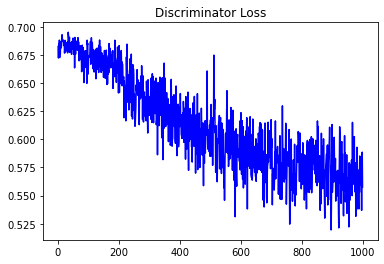

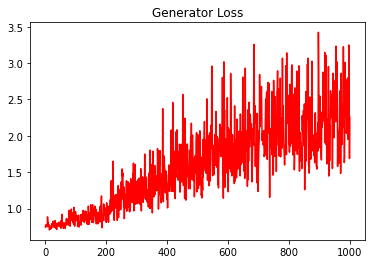

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2353053653568906


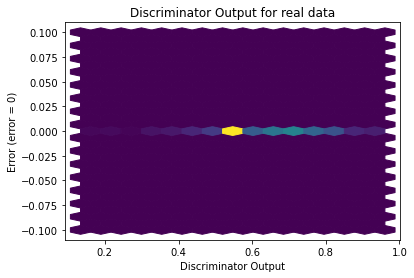

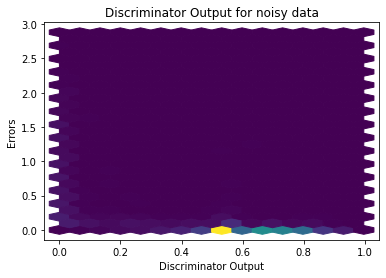

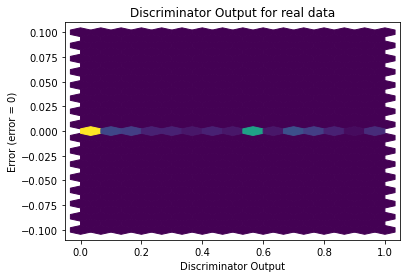

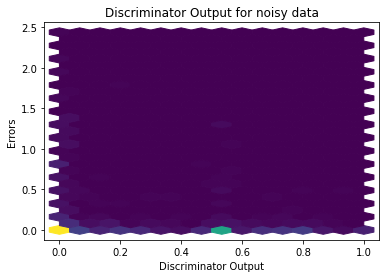

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())